# Course 4 - Project - Part 9: Results

<a name="top-9"></a>
This notebook is concerned with *Part 9: Results*.

**Contents:**
* [Step 1: Results](#step-9.1)

## Step 1: Results<a name="step-9.1"></a> ([top](#top-9))
---

We begin with some imports.

In [1]:
# Standard library.
import pathlib
import typing as T

# 3rd party.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Project.
import utils

We read the data-frame with all the results.

In [2]:
df_results = utils.get_or_create_results().reset_index().sort_values(by='part')
df_results.style.highlight_max()

,name,part,desc,test_acc
0,k-NN,part-03,"scaler=None, knn__n_neighbors=7, knn__metric=minkowski, knn__p=1",0.92
1,decision tree (md=3),part-04-a,max_depth=3,0.72
2,pca + decision tree (md=3),part-04-b,"pca__n_components=14, dt__max_depth=3",0.78
3,pca + decision tree (md=*),part-04-c,"pca__n_components=25, dt__max_depth=5",0.8
4,logistic ovo/ovr/softmax,part-05-a,"strategy=ovo, C=0.01",0.92
5,logistic ovr/softmax,part-05-b,"strategy=multinomial, C=0.46415888336127775",0.94
6,random forest,part-06-a,"n_estimators=100, max_depth=4, class_weight=balanced",0.96
7,svm linear,part-06-b,"svm_class=SVC, kernel=linear, C=0.001, class_weight=None",0.96
8,svm rbf,part-06-c,"svm_class=SVC, kernel=rbf, C=10000.0, gamma=scale, class_weight=balanced",0.9
9,1-layer nn,part-07-a,"dropout_rate=0.3333333333333333, l2_alpha=0.01",0.9


We present a final visualization which summarizes the test accuracy of all of the models.

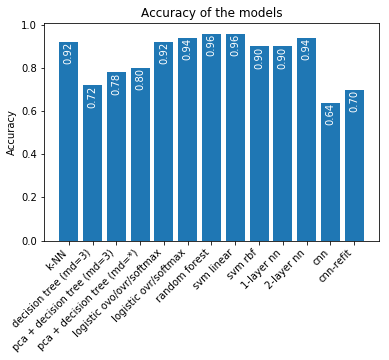

In [3]:
labels = df_results['name']
acc_values = df_results['test_acc']

fig, ax = plt.subplots()
xcor = np.arange(len(acc_values))
ax.bar(xcor, acc_values)
ax.set_xticks(xcor)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Accuracy')

for i, acc in enumerate(acc_values):
    plt.annotate(f'{acc:,.2f}', xy=(i, acc), rotation=90, color="white", ha='center', va='top')

ax.set_title(f'Accuracy of the models')
plt.show()